## Rapport Technique de l’SAE 1.02 (séance TP3) : S'initier aux réseaux informatiques - Groupe 10 

## 1. Introduction et Présentation de la Maquette
Cette maquette simule une infrastructure réseau d'entreprise centralisée autour d'un routeur Cisco 2911 et d'un switch Cisco 2960. L'objectif est de segmenter le réseau en plusieurs départements (VLANs) pour optimiser la sécurité et la gestion du trafic.

- VLAN 10 – ADMIN : réseau réservé aux administrateurs informatiques. Il héberge également le serveur web interne contenant une page statique de présentation de l’entreprise.
- VLAN 20 – PERSONNEL : réseau destiné aux postes des employés.
- VLAN 30 – PRODUCTION : réseau utilisé pour les machines de production de l’usine.
- VLAN 40 – VIDEO : réseau dédié au transport des flux vidéo internes.

L’architecture repose sur :

Un routeur : Chargé de l’inter-VLAN routing et de la distribution dynamique des adresses IP via DHCP.

Un switch : Point central de connexion des équipements finaux.

travail personel **- Le fichier de simulation Cisco Packet Tracer (.pkt) est joint à ce README et permet de visualiser et tester l’ensemble de la maquette réseau ainsi que les configurations mises en place-**
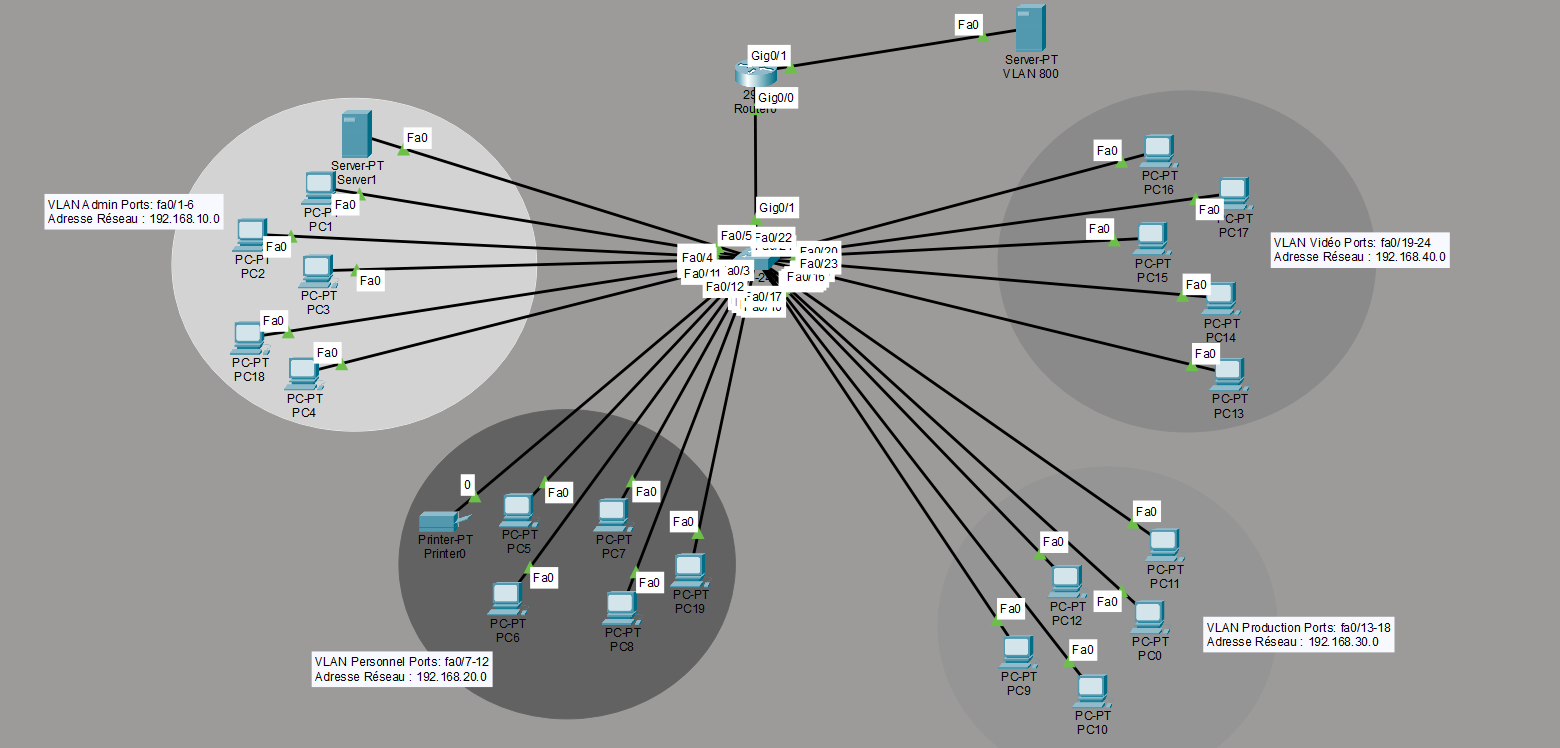

## 2. Configuration du Réseau (Plan d'Adressage)
La segmentation est réalisée via quatre VLANs distincts, chacun ayant sa propre plage d'adressage IP:

| Réseau | VLAN | Plage Réseau / Masque | Passerelle (Router) | Usage |
| :--- | :---: | :--- | :--- | :--- |
| **ADMIN** | $10$ | $192.168.10.0/24$ | $192.168.10.1$ | Accès administrateurs |
| **PERSONNEL** | $20$ | $192.168.20.0/24$ | $192.168.20.1$ | Dialogue employés |
| **PRODUCTION** | $30$ | $192.168.30.0/24$ | $192.168.30.1$ | Machines usine |
| **VIDÉO** | $40$ | $192.168.40.0/24$ | $192.168.40.1$ | Flux vidéos |

Équipements avec IP Statiques :

Serveur Web/DNS : 192.168.10.10 (VLAN 10)

Imprimante : 192.168.20.10 (VLAN 20)

## 3. Justification du choix d’un seul switch

Pour ce projet, nous avons décidé d'utiliser un seul routeur Cisco 2911 
Ce choix est le plus logique par rapport aux besoins de l'entreprise.

Les raisons principales :
Taille de l'entreprise : Comme c'est une petite structure, un seul appareil est largement suffisant pour gérer tout le trafic.

Tout-en-un : Le routeur s'occupe de tout tout seul :

Il permet aux différents VLAN de communiquer entre eux.

Il distribue les adresses IP automatiquement (DHCP).

Il gère la connexion Internet sur le VLAN 800.

Économie et simplicité : Acheter un seul routeur coûte moins cher. C'est aussi beaucoup plus facile à configurer et à entretenir au quotidien.

## 4. Justification du choix d’un seul routeur

Nous avons installé un seul routeur Cisco 2911 pour les raisons suivantes :

-  Vu la taille de l'entreprise, un seul routeur est largement suffisant pour supporter tout le trafic du réseau.

- Un équipement polyvalent : Le routeur gère seul toutes les tâches importantes, comme :

La communication entre les VLANs (routage inter-VLAN).

La distribution automatique des adresses IP (serveur DHCP).

La connexion vers l'extérieur via le VLAN 800.

Gain de temps et d'argent : Avoir un seul appareil permet de réduire les coûts d'achat et rend la maintenance beaucoup plus simple.

## 5. Configuration des Équipements

3.1. Routeur (Router-on-a-Stick)
Le port GigabitEthernet0/0 est configuré avec des sous-interfaces pour chaque VLAN en utilisant l'encapsulation dot1q.

* **Côté Switch :** Le port tague les trames avec l'ID du VLAN (10, 20, etc.).
* **Côté Routeur :** L'interface physique est divisée en sous-interfaces logiques, chacune agissant comme la passerelle par défaut pour son VLAN respectif.

Le service DHCP est activé pour automatiser l'adressage, en excluant les adresses des passerelles et des serveurs statiques.



In [ ]:
ROUTEUR :

Ports : GigabitEthernet0

Interface GigabitEthernet 0.x

encapsulation dot1q « numéro de vlan »

ip adress « passerelle » « masque »

interface GigabitEthernet 0

no shutdown

Commandes de config du dhcp (attribution dynamique) :

ip dhcp pool VLAN_...



3.2. Switch (Configuration des Ports)

Le switch connecte le routeur via un port Trunk (Gig0/1) et distribue les accès comme suit :

VLAN 10 (Admin) : Ports FastEthernet 0/1 à 0/6

VLAN 20 (Personnel) : Ports FastEthernet 0/7 à 0/12

VLAN 30 (Production) : Ports FastEthernet 0/13 à 0/18

VLAN 40 (Vidéo) : Ports FastEthernet 0/19 à 0/24

In [ ]:
enable
configure terminal
vlan 10
 name VLAN 10
exit
vlan 20
 name VLAN 20
exit
vlan 30
 name VLAN 30
exit
vlan 40
 name VLAN 40
exit
vlan 800
 name VLAN 800
exit

## 6. Configuration du service DHCP sur le routeur

Le service DHCP est configuré directement sur le routeur Cisco 2911
Un pool DHCP est créé pour chaque VLAN afin d’attribuer automatiquement les paramètres réseau aux postes clients.

### 6.1 Exclusion des adresses IP réservées
Certaines adresses IP sont exclues du DHCP afin d’être réservées aux équipements critiques (routeur, serveurs).
On exclut ces adresses pour empêcher le DHCP de les distribuer à des PC, ce qui créerait un **conflit d'IP** avec les équipements à adresse fixe.
Cela garantit que l'infrastructure vitale (Passerelle routeur, Serveur Web, Imprimante) reste stable et toujours accessible sans risque de doublon.

In [ ]:
ip dhcp excluded-address 192.168.10.1
ip dhcp excluded-address 192.168.20.1
ip dhcp excluded-address 192.168.30.1
ip dhcp excluded-address 192.168.40.1
ip dhcp excluded-address 192.168.10.10 (serveur local)
ip dhcp excluded-address 192.168.20.10 (imprimante)

### 6.2 Création des pools DHCP
- VLAN 10 – ADMIN
- VLAN 20 – Personnel
- VLAN 30 – Production
- VLAN 40 - Video

In [ ]:
ip dhcp pool VLAN_10
 network 192.168.10.0 255.255.255.0
 default-router 192.168.10.1
 dns-server 192.168.10.10

 ip dhcp pool VLAN_20
 network 192.168.20.0 255.255.255.0
 default-router 192.168.40.1
 dns-server 192.168.10.10

ip dhcp pool VLAN_30
 network 192.168.30.0 255.255.255.0
 default-router 192.168.30.1
 dns-server 192.168.10.10

ip dhcp pool VLAN_40
 network 192.168.40.0 255.255.255.0
 default-router 192.168.40.1
 dns-server 192.168.10.10

### 6.3 Commandes de vérification DHCP

Les commandes suivantes permettent de vérifier le bon fonctionnement du service DHCP : (dans le CLI)

In [ ]:
show ip dhcp pool
show ip dhcp binding
show running-config | section dhcp

## DNS
La mise en place du DNS permet aux utilisateurs d'accéder au site web de l'entreprise via l'URL www.entreprise10.local au lieu d'utiliser l'adresse IP statique du serveur (192.168.10.10).

#### A. Configuration du Serveur DNS
Sur le serveur situé dans le VLAN 10, le service a été configuré comme suit :

Activation du service : Le bouton DNS a été mis sur ON.

Enregistrement A (Host) : Liaison du nom de domaine à l'IP du serveur.

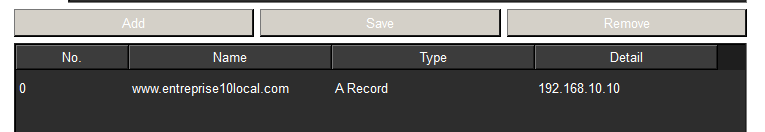

Nom : www.entreprise10local.com | Adresse : 192.168.10.10.

Pour que les clients puissent interroger ce serveur, l'adresse du DNS a été intégrée dans les pools DHCP du routeur R1.



## Les ACL (La Sécurité)

Le problème : Par défaut, un routeur fait communiquer tout le monde. Sans sécurité, n'importe quel employé du réseau "Personnel" pourrait se connecter aux caméras de sécurité ou aux machines de production. Pour la sécurité de l'entreprise, c'est un gros risque ://

La solution : Les ACLs (listes de contrôle d'accès) On a créé des filtres pour décider qui a le droit de passer :

L'ACL 150 (La protection du réseau Admin) : On a mis une barrière à l'entrée du réseau Admin (en mode OUT sur l'interface). Résultat : personne ne peut entrer chez les Admins, sauf pour une seule chose : consulter le site web de l'entreprise (Port 80).

Les ACL 120 et 130 (Pour isoler les réseaux entre eux) : Ici, on a mis des règles à l'entrée des réseaux Personnel et Production (en mode IN). La logique est super simple :

Si un PC essaie d'aller vers un autre réseau interne (192.168...), le routeur bloque le passage.

Si le PC veut aller n'importe où ailleurs (donc sur Internet), le routeur autorise.

L'exception pour le Serveur Web : Pour que le réseau reste pratique, on a ajouté une règle spéciale (permit tcp ... eq 80). Comme ça, même si les réseaux sont isolés, tout le monde peut quand même afficher la page web de l'entreprise qui est stockée sur le serveur des Admins.

In [ ]:
On utilise une ACL Étendue (150)
1. LE "RETOUR DE COURRIER" (Vital)
Si l'Admin a demandé quelque chose (ex: SSH vers un switch, ouvrir Google),
on autorise la réponse à rentrer.
Router(config)# access-list 150 permit tcp any 192.168.10.0 0.0.0.255 established
Router(config)# access-list 150 permit icmp any 192.168.10.0 0.0.0.255 echo-reply

2. L'EXCEPTION "SERVEUR"
Le monde extérieur a le droit de parler au Serveur, mais UNIQUEMENT au serveur
et UNIQUEMENT sur les ports de service (Web, DNS).

Accès Web (HTTP/HTTPS)
Router(config)# access-list 150 permit tcp any host 192.168.10.10 eq 80
Router(config)# access-list 150 permit tcp any host 192.168.10.10 eq 443

Accès DNS (UDP)
Router(config)# access-list 150 permit udp any host 192.168.10.10 eq 53

3. INTERDICTION TOTALE
Tout le reste est bloqué. Personne ne peut pinger l'Admin, ni tenter de se connecter à l’un des PC de ce réseau.
Router(config)# access-list 150 deny ip any any

Interface du VLAN ADMIN (ex: vlan 10)
Router(config)# interface GigabitEthernet0/0.1

On applique la règle en sortie
Router(config-subif)# ip access-group 150 out


## Accès à distance sécurisé (SSH)
Le but est de permettre à l'administrateur de configurer le routeur à distance sans avoir à se brancher dessus avec un câble à chaque fois.

Pourquoi avoir choisi le SSH au lieu du Telnet ?
Le problème avec Telnet : De base, on utilise souvent Telnet, mais c'est dangereux. Telnet envoie les mots de passe "en clair" sur le réseau. Si quelqu'un "écoute" le trafic, il peut voler les codes d'accès super facilement.

La solution SSH (Le cryptage) : On a donc activé le SSH. Pour ça, on a généré des clés de sécurité spéciales (clés RSA). Grâce à ces clés, toutes les informations (comme les mots de passe) sont cryptées. Même si un espion intercepte les données, il ne pourra rien lire du tout.

In [ ]:
R1(config)# ip domain-name entreprise10.local

R1(config)# crypto key generate rsa
(On a choisi 2048 bits)

R1(config)# username groupe10 secret GROUPE10

R1(config)# line vty 0 4
R1(config-line)# transport input ssh      -- N'accepte que SSH (interdit Telnet)
R1(config-line)# login local              -- Dit d'utiliser l'utilisateur "groupe10" créé plus haut
R1(config-line)# exec-timeout 5 0         -- Déconnecte après 5 min d'inactivité (Bonus sécurité)
R1(config-line)# access-class 10 in       -- Restreint l'accès au VLAN Admin uniquement
R1(config-line)# exit
R1(config)# enable secret GROUPE10           Permet le contrôle total à distance

## Conclusion et Bilan du Projet

Pour conclure, nous avons réussi à mettre en place tout le réseau demandé. L’infrastructure est maintenant fonctionnelle, sécurisée et elle répond à tous les besoins de l’entreprise.

- Un réseau bien organisé : On a séparé chaque service (Admin, Personnel, Production et Vidéo) grâce aux VLANs pour que personne ne se mélange.

- Une sécurité solide : On a bloqué les accès inutiles avec des ACLs et on a sécurisé la gestion du routeur à distance avec le SSH.

- Des services qui marchent : Les PC reçoivent leurs adresses automatiquement (DHCP), les noms de domaine fonctionnent (DNS) et tout le monde peut aller sur Internet grâce au NAT.

La maquette est stable. Elle est prête à être utilisée ou même à être améliorée plus tard en ajoutant de nouveaux services.

## Les tests et les screens
### ARP

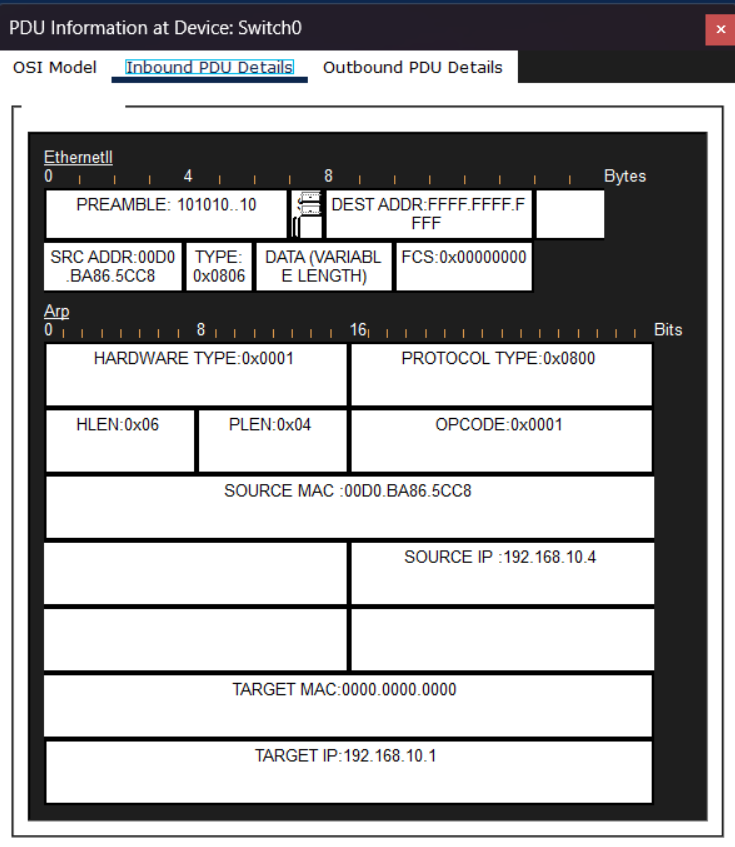

### ICMP

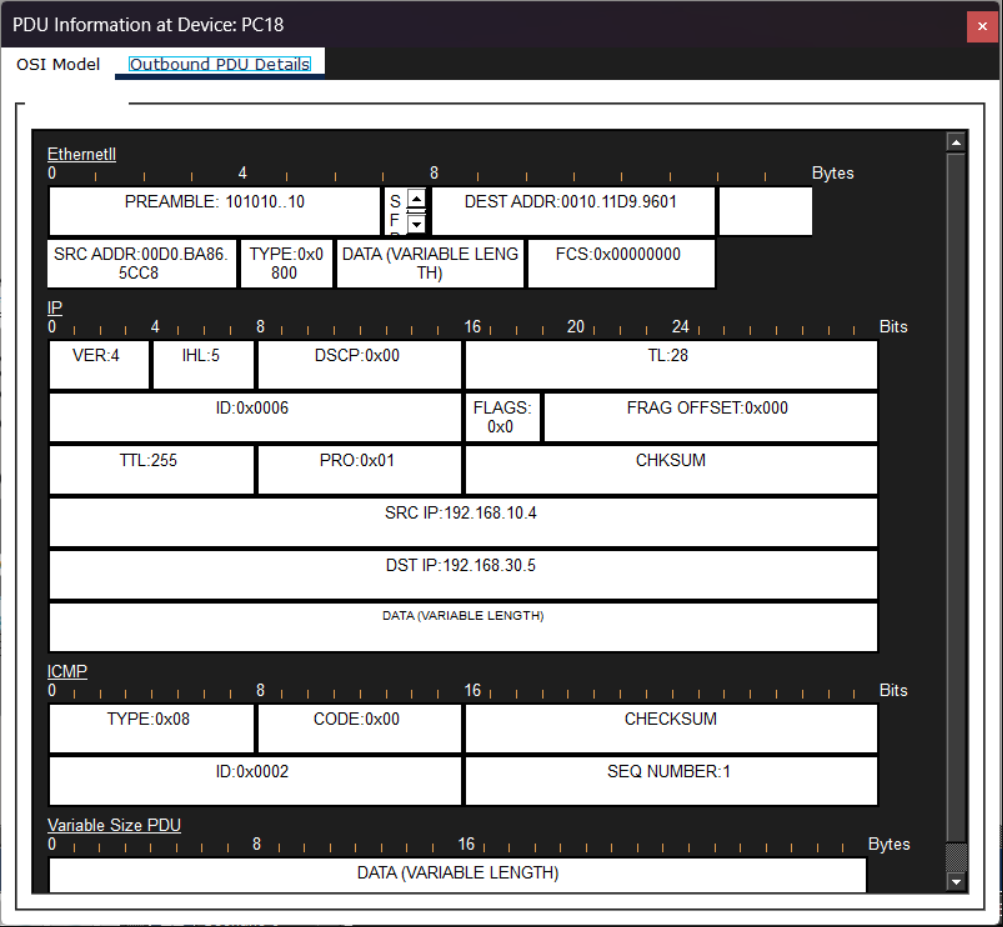

### DNS 

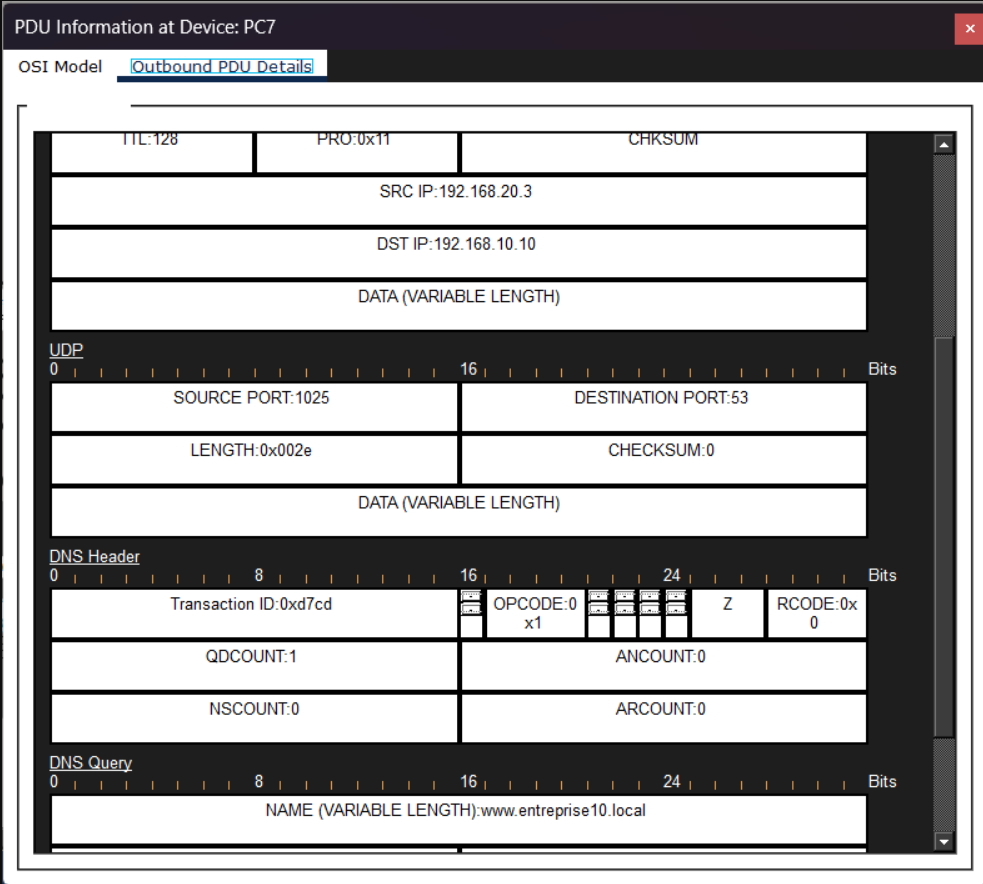